Decision tree example using the classic IRIS [data set](https://en.wikipedia.org/wiki/Iris_flower_data_set), which has 50 samples from each of three species of Iris (setosa, virginica, versicolor). Four features were measured from each sample: the length and width of the sepals and petals in centimeters.

![Imgur](https://i.imgur.com/aJqnqC6.png)

From scikit-learn we import **tree**, the decision tree learning package ,and **datasets**, which provides functrions to load some sample datasets.

We also import standard Python packages **graphviz**, for producing graphics, and **pickle**, for writing and reading complex Python objects, which we'll use to save models.

In [0]:
from sklearn import tree, datasets
import graphviz, pickle

The dataset [load_iris()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) function returns a scikit bunch object, which has a **data** and **target** for our iris dataset.

The **data** is an 150x4 array of the four measurements for each of the 150 samples and the  **target** is a vector of 150 category values (i.e., iris species)

In [3]:
iris = datasets.load_iris()
print('data:', iris.data.shape, 'target', iris.target.shape)

data: (150, 4) target (150,)


Use scikit's DecisionTreeClassifier and use the fit() method to train a decision tree classifier using **data** and **target**.  Note: 
* **clf** is a common variable to use for a **cl**assi**f**ier.
* A comon convention is to name the data **X** and the answers **y**

In [0]:
clf = tree.DecisionTreeClassifier()
X = iris.data
y = iris.target
clf = clf.fit(X, y)

The tree model's predict() method returns a predicted class for one new data item as a one-dimentioanal array of length 1.

In [20]:
answer = clf.predict([[5.5, 3.4, 4.5, 1.0]])
print("shape:", answer.shape, "dimentions:", answer.ndim, "; value:", answer )

shape: (1,) dimentions: 1 ; value: [1]


For efficency, scikit encodes the categories as integers, but the **iris_data** bunch has a **target_names** property that is a numpy vector of the names.  This let's easily map the result to its name.

In [18]:
print('target names:', iris.target_names)
print('result:', iris.target_names[answer[0]])

target names: ['setosa' 'versicolor' 'virginica']
result: versicolor


Save the model in a file named iris.p, so it can be loaded and used later

In [0]:
pickle.dump(clf, open("iris.p", 'wb'))

We can visualize the decision tree using the [Graphviz](https://www.graphviz.org/) open source graph visualization package

In [0]:
dot_data = tree.export_graphviz(clf,
                                out_file=None, 
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True)

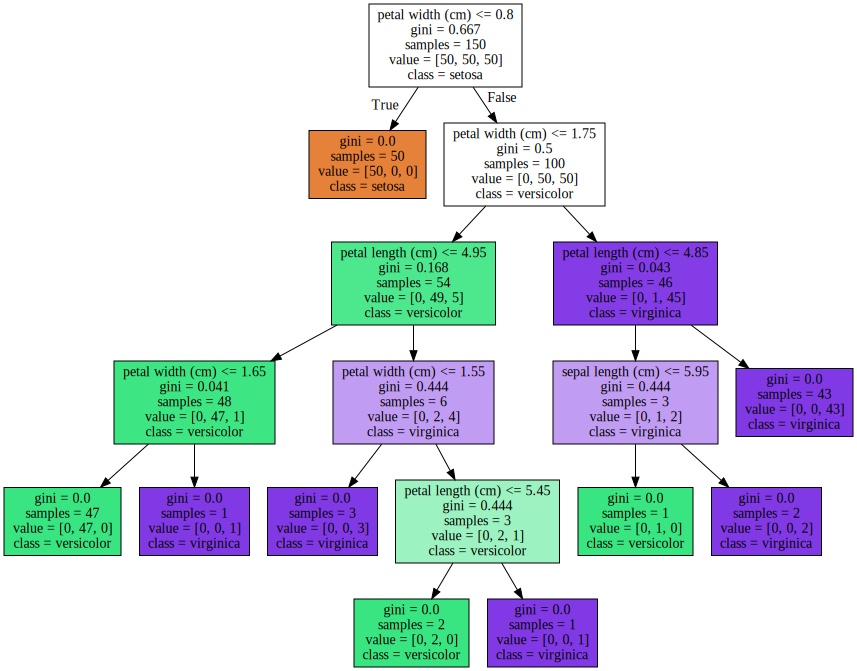

In [0]:
graph = graphviz.Source(dot_data) 
graph.render("iris") 
graph